# 2 - WeatherFile Creation - SAM format to TMY3 format

bifacial_radiance worked originally with TMY3 data format 

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import bifacial_radiance
bifacial_radiance.__version__

'0.4.2+154.g83c7fcf'

In [2]:
from datetime import date

today = date.today()
print("Last run:", today)

Last run: 2023-05-04


In [3]:
testfolder = 'TEMP'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [4]:
rad_obj = bifacial_radiance.RadianceObj('Evaluation', 'TEMP')

# Original Sim
moduletype='PVmod_portrait_1xgap'
x = 1
y = 2

rad_obj.makeModule(name=moduletype, x=x, y=y, xgap = 1.0)


moduletype='PVmod_portrait_6modbay_2xgap'
x = 6
y = 2

rad_obj.makeModule(name=moduletype, x=x, y=y, xgap = 2.0)


moduletype='PVmod_portrait'
x = 1
y = 2

rad_obj.makeModule(name=moduletype, x=x, y=y)


moduletype='PVmod_landscape'
x = 2
y = 1

rad_obj.makeModule(name=moduletype, x=x, y=y)


moduletype='PVmod_landscape_1xgap'
x = 2
y = 1

rad_obj.makeModule(name=moduletype, x=x, y=y, xgap=1.0)


moduletype='PVmod_landscape_4modbay_2xgap'
x = 8  # 4 modules together
y = 1

rad_obj.makeModule(name=moduletype, x=x, y=y, xgap = 2.0)


path = TEMP

Module Name: PVmod_portrait_1xgap
Module PVmod_portrait_1xgap updated in module.json
Pre-existing .rad file objects\PVmod_portrait_1xgap.rad will be overwritten


Module Name: PVmod_portrait_6modbay_2xgap
Module PVmod_portrait_6modbay_2xgap updated in module.json
Pre-existing .rad file objects\PVmod_portrait_6modbay_2xgap.rad will be overwritten


Module Name: PVmod_portrait
Module PVmod_portrait updated in module.json
Pre-existing .rad file objects\PVmod_portrait.rad will be overwritten


Module Name: PVmod_landscape
Module PVmod_landscape updated in module.json
Pre-existing .rad file objects\PVmod_landscape.rad will be overwritten


Module Name: PVmod_landscape_1xgap
Module PVmod_landscape_1xgap updated in module.json
Pre-existing .rad file objects\PVmod_landscape_1xgap.rad will be overwritten


Module Name: PVmod_landscape_4modbay_2xgap
Module PVmod_landscape_4modbay_2xgap updated in module.json
Pre-existing .rad file objects\PVmod_landscape_4modbay_2xgap.rad will be ov

{'x': 8, 'y': 1, 'z': 0.02, 'modulematerial': 'black', 'scenex': 10.0, 'sceney': 1.0, 'scenez': 0.1, 'numpanels': 1, 'bifi': 1, 'text': '! genbox black PVmod_landscape_4modbay_2xgap 8 1 0.02 | xform -t -4.0 -0.5 0 -a 1 -t 0 1.0 0', 'modulefile': 'objects\\PVmod_landscape_4modbay_2xgap.rad', 'glass': False, 'offsetfromaxis': 0, 'xgap': 2.0, 'ygap': 0.0, 'zgap': 0.1}

# Weather File modification

In [7]:
# Read in the weather data pulled in above. 
metdata = rad_obj.readWeatherFile('../../DATA/WeatherFilesNASA/POWER_Point_Hourly_20160101_20161231_090d00S_000d00E_LT.csv', 
                               coerce_year=2021, source='sam') 
rad_obj.setGround(0.7)
rad_obj.genCumSky() # entire year

Coercing year to 2021


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:760: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  warnings.warn(


Data ends on Dec. 31st
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is left-labeled  with a delta of +30 mins. i.e. 12 is 12:30 sunpos.


C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1200: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1211: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1212: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1229: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


Loading albedo, 1 value(s), 0.700 avg
1 nonzero albedo values.
Loaded  EPWs\metdata_temp.csv
message: There were 4065 sun up hours in this climate file
Total Ibh/Lbh: 0.000000


'skies\\cumulative.rad'

In [ ]:
for setup in range(12, 13):

    if setup==0:
        moduletype = 'PVmod_portrait_1xgap'
        nMods = 20
        nRows = 7
        rtr = 8.0
        tilt = 90

    if setup==1:
        moduletype = 'PVmod_portrait_6modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 8.0
        tilt = 90
        
    if setup==2:
        moduletype = 'PVmod_portrait'
        nMods = 20
        nRows = 7
        rtr = 8.0
        tilt = 90
        
    if setup==3:
        moduletype = 'PVmod_landscape'
        nMods = 20
        nRows = 7
        rtr = 8.0
        tilt = 90
        
    if setup==4:
        moduletype = 'PVmod_landscape_1xgap'
        nMods = 20
        nRows = 7
        rtr = 8.0
        tilt = 90
        
    if setup==5:
        moduletype = 'PVmod_landscape_4modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 8.0
        tilt = 90
        
    if setup==6:
        moduletype = 'PVmod_portrait_1xgap'
        nMods = 20
        nRows = 7
        rtr = 6.0
        tilt = 90
        
    if setup==7:
        moduletype = 'PVmod_portrait_6modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 6.0
        tilt = 90
        
    if setup==8:
        moduletype = 'PVmod_landscape_4modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 6.0
        tilt = 90
        
    if setup==9:
        moduletype = 'PVmod_portrait_1xgap'
        nMods = 20
        nRows = 7
        rtr = 10.0
        tilt = 90
        
    if setup==10:
        moduletype = 'PVmod_portrait_6modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 10.0
        tilt = 90
        
    if setup==11:
        moduletype = 'PVmod_landscape_4modbay_2xgap'
        nMods = 5
        nRows = 8
        rtr = 10.0
        tilt = 90
        
    if setup==12:
        moduletype = 'PVmod_portrait_1xgap'
        nMods = 20
        nRows = 7
        rtr = 8.0
        tilt = 35
    
    clearance_height = 0.6
    azimuth = 180
    sim_name = 'SETUP_'+str(setup)
    sceneDict = {'tilt':tilt,'pitch':rtr,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
    scene = rad_obj.makeScene(module=moduletype,sceneDict=sceneDict,radname = sim_name)
    octfile = rad_obj.makeOct()  
    analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name, hpc=True)
    frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=12, sensorsx=1)
    frontdict, backdict = analysis.analysis(octfile, name=sim_name+'_NS_',frontscan=frontscan, backscan=backscan)

    azimuth = 90
    sceneDict = {'tilt':tilt,'pitch':rtr,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
    scene = rad_obj.makeScene(module=moduletype,sceneDict=sceneDict,radname = sim_name)
    octfile = rad_obj.makeOct()  
    analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name, hpc=True)
    frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=12, sensorsx=1)
    frontdict, backdict = analysis.analysis(octfile, name=sim_name+'_EW_',frontscan=frontscan, backscan=backscan)

## Read results and plot

In [5]:
dir_list = os.listdir('results')

setupname = []
directionname = []
WMfront = []
WMback = []
WMfrontmean = []
WMbackmean = []

for filename in dir_list:
    data = pd.read_csv(os.path.join('results', filename))
    setupname.append(int(filename.split('_')[2]))
    directionname.append(filename.split('_')[3])
    WMfront.append(list(data['Wm2Front']))
    WMback.append(list(data['Wm2Back']))
    WMfrontmean.append(data['Wm2Front'].mean())
    WMbackmean.append(data['Wm2Back'].mean())

In [6]:
data = pd.DataFrame(zip(setupname, directionname, WMfront, WMback, WMfrontmean, WMbackmean), 
             columns=['Setup', 'Orientation', 'WMFront', 'WMBack', 'WMFrontMean', 'WMBackMean'])
data = data.sort_values('Setup')

In [7]:
import matplotlib.pyplot as plt

In [8]:
xs = np.arange(0, 13)

In [9]:
NFront = list(data[data['Orientation']=='NS']['WMFrontMean'])
NBack = list(0.7*data[data['Orientation']=='NS']['WMBackMean'])
SFront = list(0.7*data[data['Orientation']=='NS']['WMFrontMean'])
SBack = list(data[data['Orientation']=='NS']['WMBackMean'])

EFront = list(data[data['Orientation']=='EW']['WMFrontMean'])
EBack = list(0.7*data[data['Orientation']=='EW']['WMBackMean'])
WFront = list(0.7*data[data['Orientation']=='EW']['WMFrontMean'])
WBack = list(data[data['Orientation']=='EW']['WMBackMean'])

res = [n+nb+s+sb+e+eb+w+wb for n, nb, s, sb, e, eb, w, wb in zip(NFront, NBack, SFront, SBack, EFront, EBack, WFront, WBack)]
norm = [float(i)/max(res) for i in res]

In [13]:
norm

[0.9392111817513216,
 0.8813078431467416,
 0.8816472650033571,
 0.9668924262345738,
 1.0,
 0.9851142095229933,
 0.8896703339799725,
 0.7992806166233464,
 0.939399171580361,
 0.9728842381700317,
 0.9386129425311928,
 0.9989043266379694,
 0.7451507517164951]

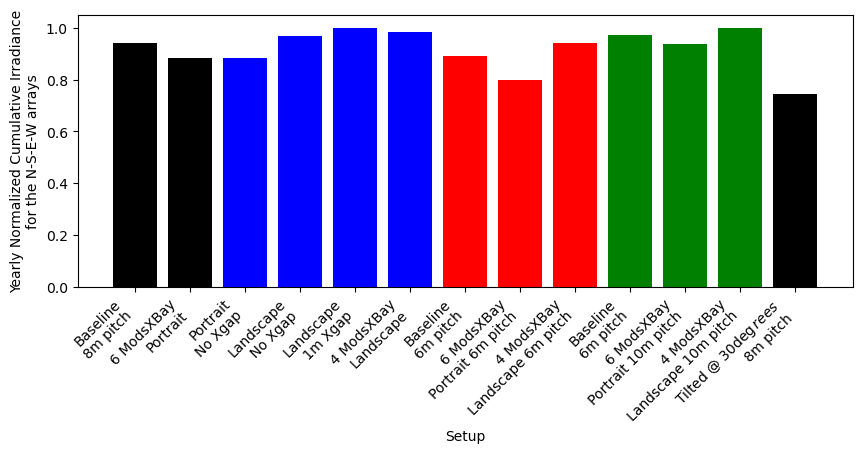

In [10]:
fig, ax = plt.subplots(figsize = (10,4))

ax.bar(xs, norm, label='Testbed A', color=['black', 'black', 'blue', 'blue', 'blue', 'blue',
                                          'red', 'red', 'red', 'green', 'green', 'green'])
ax.set_ylabel('Yearly Normalized Cumulative Irradiance\nfor the N-S-E-W arrays')
ax.set_xlabel('Setup')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Baseline\n 8m pitch','6 ModsXBay\nPortrait','Portrait\nNo Xgap', 'Landscape\n No Xgap', 'Landscape\n 1m Xgap',
                    '4 ModsXBay\nLandscape',
                    'Baseline\n 6m pitch','6 ModsXBay\nPortrait 6m pitch', '4 ModsXBay\nLandscape 6m pitch',
                    'Baseline\n 6m pitch','6 ModsXBay\nPortrait 10m pitch', '4 ModsXBay\nLandscape 10m pitch',
                    'Tilted @ 30$\degrees$\n 8m pitch'])
fig.autofmt_xdate(rotation=45)

In [11]:
data.to_csv('data.csv')